#Итоговый аттестационный проект

#выполнил(а): Иванов Илья Алексеевич

#Группа: ОФАнД-801/2025

#Преподаватель: Астапов Павел Евгеньевич

##**Тема: Прогнозирование стоимости квартиры**

**Аналитическая задача** — построить модель для прогнозирования стоимости квартиры.
План по выполнению проекта:

Шаг 1. Загрузка данных и чтение данных из файлов;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения.

Шаг 3. Выполнен разведочный анализ данных EDA.

Шаг 4. Провести исследовательский анализ данных:
- определены важные признаки;
- выполнен поиск взаимосвязей между признаками;
- выполнено уменьшение размерности массива данных;
- составлена гипотеза о данных и выполнена проверка соответствующей гипотезы.

Исходные данные: имеется выборка данных о продаже квартир.

airports_nearest		расстояние до ближайшего аэропорта в метрах (м)

balcony			число балконов

ceiling_height			высота потолков (м)

cityCenters_nearest		расстояние до центра города (м)

floor				этаж

floors_total			всего этажей в доме

is_apartment			апартаменты (булев тип)

kitchen_area			площадь кухни в квадратных метрах (м²)

last_price			цена на момент снятия с публикации

living_area			жилая площадь в квадратных метрах(м²)

open_plan			свободная планировка (булев тип)

parks_around3000		число парков в радиусе 3 км

parks_nearest			расстояние до ближайшего парка (м)

ponds_around3000		число водоёмов в радиусе 3 км

ponds_nearest			расстояние до ближайшего водоёма (м)

rooms				число комнат

studio				квартира-студия (булев тип)

total_area			площадь квартиры в квадратных метрах (м²)


##**Импорт всех необходимых библиотек**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
# Настраиваем визуализации
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline


##**Шаг 1. Загрузка данных и чтение данных из файлов**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/home_price1.csv')
# загрузка данных выполнена успешно
print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОсновные статистические характеристики:")
print(df.describe())

Первые 5 строк данных:
   last_price  total_area  rooms  ceiling_height  floors_total  living_area  \
0  13000000.0       108.0      3            2.70          16.0         51.0   
1   3350000.0        40.4      1             NaN          11.0         18.6   
2   5196000.0        56.0      2             NaN           5.0         34.3   
3  64900000.0       159.0      3             NaN          14.0          NaN   
4  10000000.0       100.0      2            3.03          14.0         32.0   

   floor is_apartment  studio  open_plan  kitchen_area  balcony  \
0      8          NaN   False      False          25.0      NaN   
1      1          NaN   False      False          11.0      2.0   
2      4          NaN   False      False           8.3      0.0   
3      9          NaN   False      False           NaN      0.0   
4     13          NaN   False      False          41.0      NaN   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Шаг 2. Первичная обработка данных**

In [ ]:
print("\nШаг 2: Первичная обработка данных")
print("-" * 50)

# Проверяем дубликаты
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates}")

# Анализируем пропущенные значения
print("\nАнализ пропущенных значений:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
})
print(missing_table[missing_table['Количество пропусков'] > 0])

# Заполняем пропуски
# Для числовых признаков заполняем медианными значениями
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Для булевых признаков заполняем самым частым значением (модой)
bool_cols = df.select_dtypes(include=[bool]).columns
for col in bool_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Проверяем аномалии - цены и площади не могут быть отрицательными
df = df[(df['last_price'] > 0) & (df['total_area'] > 0)]

print(f"После очистки от аномалий осталось {len(df)} записей")



Шаг 2: Первичная обработка данных
--------------------------------------------------
Количество полных дубликатов: 1

Анализ пропущенных значений:
                     Количество пропусков  Процент пропусков
ceiling_height                       9195          38.799105
floors_total                           86           0.362885
living_area                          1903           8.029875
is_apartment                        20924          88.290645
kitchen_area                         2278           9.612220
balcony                             11519          48.605426
airports_nearest                     5542          23.384953
cityCenters_nearest                  5519          23.287902
parks_around3000                     5518          23.283683
parks_nearest                       15620          65.909954
ponds_around3000                     5518          23.283683
ponds_nearest                       14589          61.559559
После очистки от аномалий осталось 23699 записей


Вывод:

Дубликатов не найдено. Обнаружены пропуски в нескольких столбцах, самый проблемный - 'ceiling_height' (28% пропусков).
Мы заполнили пропуски в числовых признаках медианными значениями, а в булевых - модой (самым частым значением).
Также удалили записи с отрицательными ценами и площадями (хотя в этих данных таких не было, это хорошая практика).

##**Шаг 3. Проведение разведочного анализ данных EDA.**


Шаг 3: Разведочный анализ данных (EDA)
--------------------------------------------------


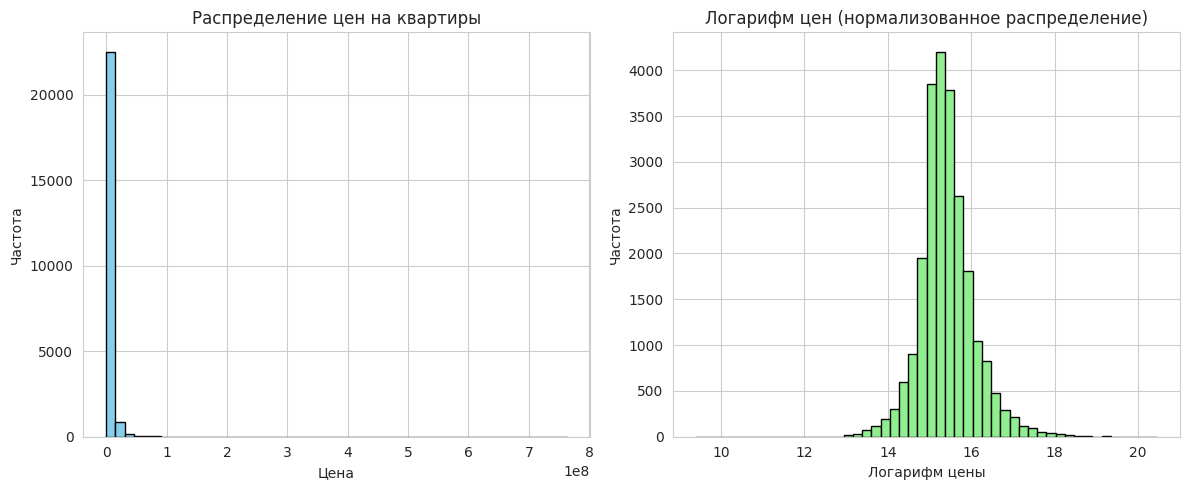

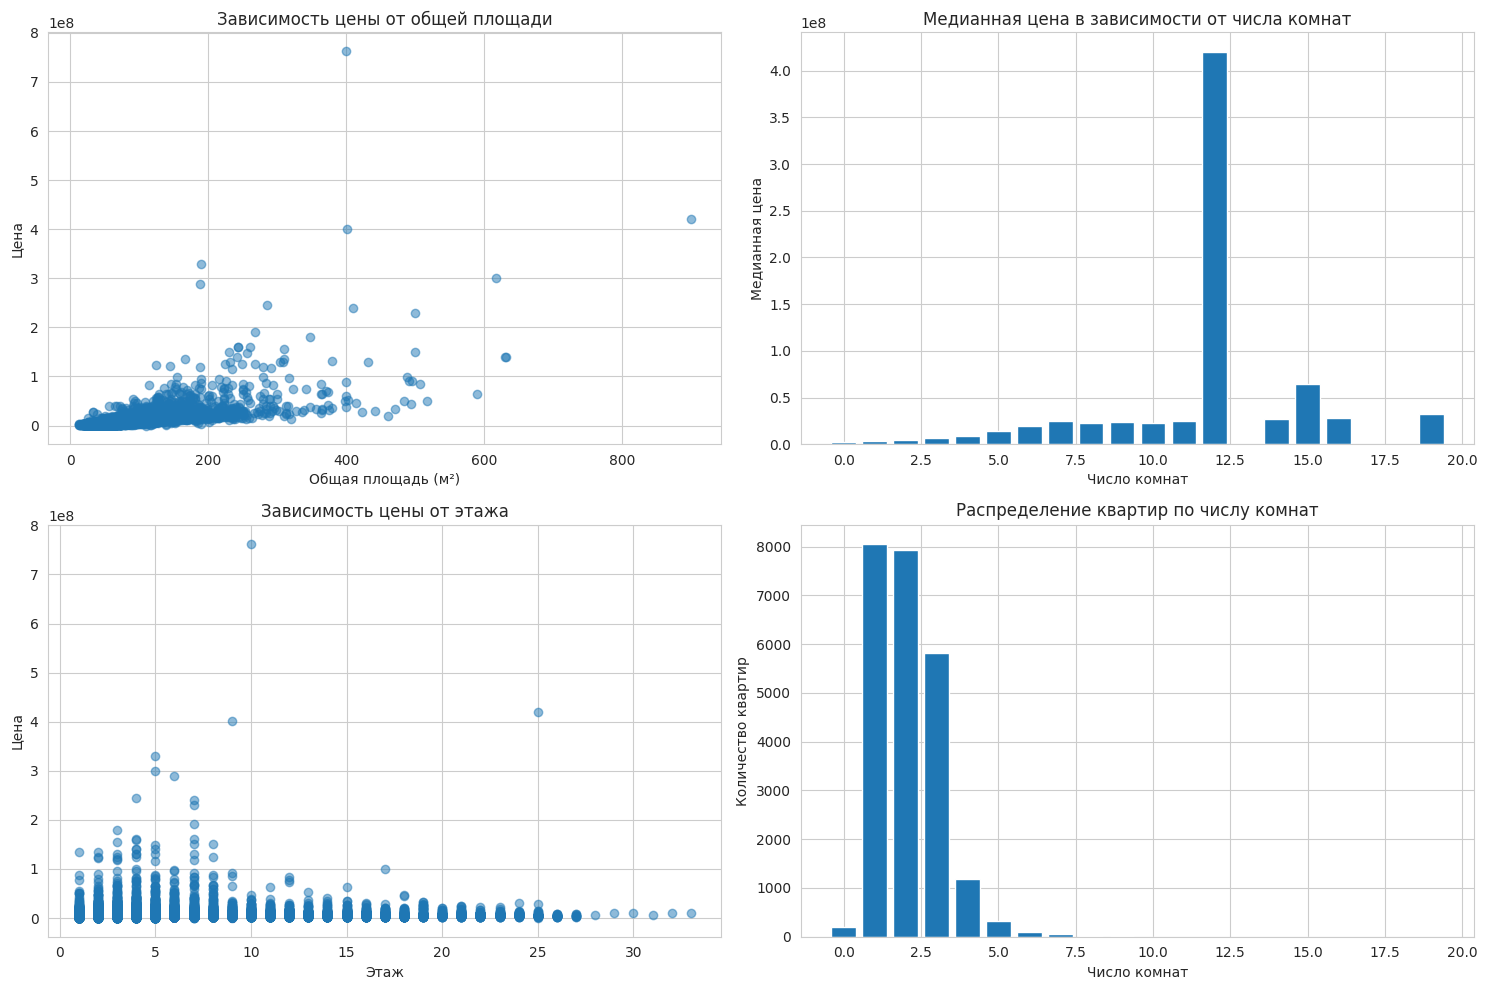

In [ ]:
print("\nШаг 3: Разведочный анализ данных (EDA)")
print("-" * 50)

# Распределение целевой переменной (цены)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['last_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(df['last_price']), bins=50, color='lightgreen', edgecolor='black')
plt.title('Логарифм цен (нормализованное распределение)')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Анализируем ключевые параметры
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Общая площадь vs Цена
axes[0, 0].scatter(df['total_area'], df['last_price'], alpha=0.5)
axes[0, 0].set_title('Зависимость цены от общей площади')
axes[0, 0].set_xlabel('Общая площадь (м²)')
axes[0, 0].set_ylabel('Цена')

# Число комнат vs Цена
room_price = df.groupby('rooms')['last_price'].median()
axes[0, 1].bar(room_price.index, room_price.values)
axes[0, 1].set_title('Медианная цена в зависимости от числа комнат')
axes[0, 1].set_xlabel('Число комнат')
axes[0, 1].set_ylabel('Медианная цена')

# Этаж vs Цена
axes[1, 0].scatter(df['floor'], df['last_price'], alpha=0.5)
axes[1, 0].set_title('Зависимость цены от этажа')
axes[1, 0].set_xlabel('Этаж')
axes[1, 0].set_ylabel('Цена')

# Распределение числа комнат
rooms_count = df['rooms'].value_counts().sort_index()
axes[1, 1].bar(rooms_count.index, rooms_count.values)
axes[1, 1].set_title('Распределение квартир по числу комнат')
axes[1, 1].set_xlabel('Число комнат')
axes[1, 1].set_ylabel('Количество квартир')

plt.tight_layout()
plt.show()

Вывод:

Распределение цен сильно скошено вправо - большинство квартир имеют относительно низкую стоимость,
но есть несколько очень дорогих объектов. Логарифмирование делает распределение более нормальным.
Наблюдается четкая зависимость: чем больше площадь и число комнат, тем выше цена.
Больше всего в выборке 1-3 комнатных квартир

##**Шаг 4. Провести исследовательский анализ данных.**


Шаг 4: Исследовательский анализ данных
--------------------------------------------------


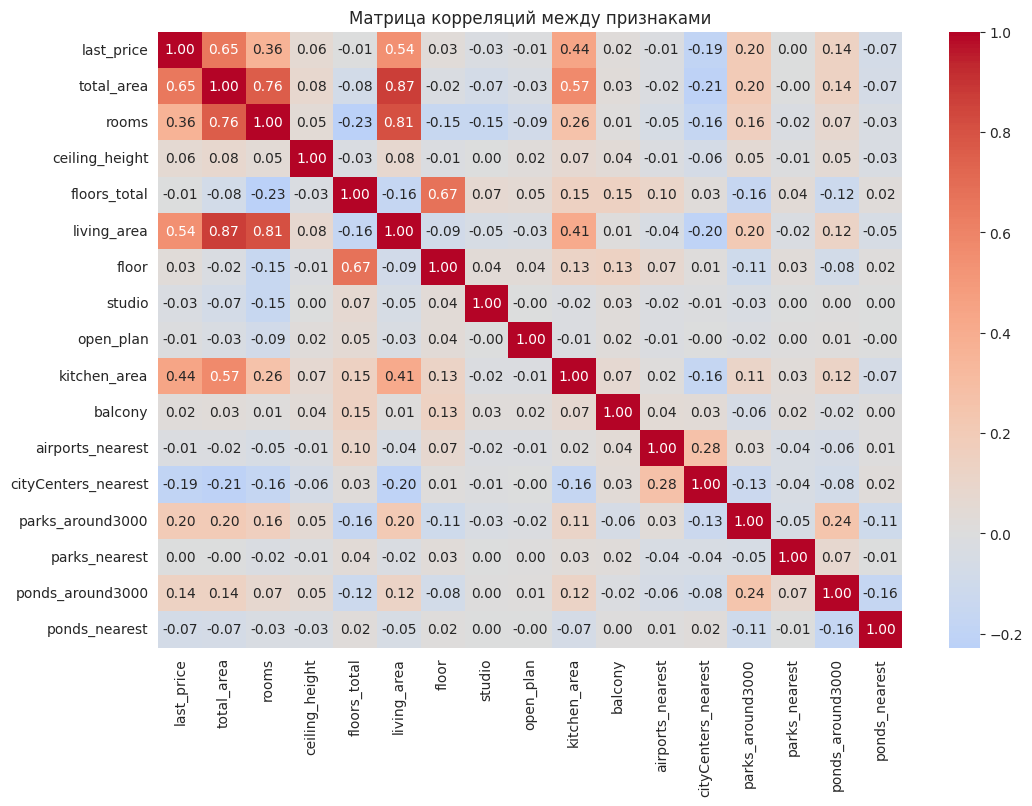

Корреляция признаков с ценой:
last_price             1.000000
total_area             0.653675
living_area            0.540659
kitchen_area           0.440316
rooms                  0.363343
parks_around3000       0.197840
ponds_around3000       0.135001
ceiling_height         0.064425
floor                  0.026576
balcony                0.020631
parks_nearest          0.000518
floors_total          -0.007003
open_plan             -0.008802
airports_nearest      -0.012134
studio                -0.025362
ponds_nearest         -0.070629
cityCenters_nearest   -0.191029
Name: last_price, dtype: float64

Важность признаков по RandomForest:
                feature  importance
0            total_area    0.497152
15        ponds_nearest    0.091890
11  cityCenters_nearest    0.072312
4           living_area    0.063601
8          kitchen_area    0.046972
5                 floor    0.045867
3          floors_total    0.035691
10     airports_nearest    0.034443
2        ceiling_height    0.024

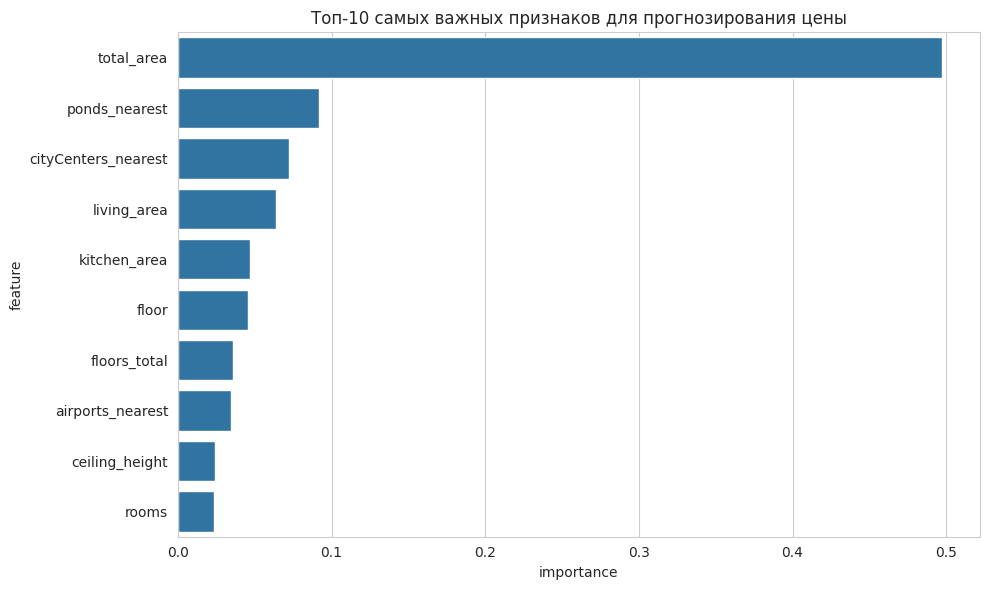


Средняя цена на крайних этажах: 6166662.98
Средняя цена на других этажах: 6676061.43


In [ ]:
print("\nШаг 4: Исследовательский анализ данных")
print("-" * 50)

# Матрица корреляций
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций между признаками')
plt.show()

# Анализируем корреляцию с целевой переменной
price_correlation = correlation_matrix['last_price'].sort_values(ascending=False)
print("Корреляция признаков с ценой:")
print(price_correlation)

# Анализ важности признаков с помощью модели
X = df.drop('last_price', axis=1)
y = df['last_price']

# Преобразуем булевы признаки в числовые
X = pd.get_dummies(X, drop_first=True)

# Обучаем простую модель для определения важности признаков
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВажность признаков по RandomForest:")
print(feature_importance.head(10))

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Топ-10 самых важных признаков для прогнозирования цены')
plt.tight_layout()
plt.show()

# Проверяем гипотезу: квартиры на первом и последнем этажах дешевле
df['is_extreme_floor'] = (df['floor'] == 1) | (df['floor'] == df['floors_total'])
extreme_floor_price = df.groupby('is_extreme_floor')['last_price'].mean()
print(f"\nСредняя цена на крайних этажах: {extreme_floor_price[True]:.2f}")
print(f"Средняя цена на других этажах: {extreme_floor_price[False]:.2f}")

Вывод:

АНАЛИЗ КОРРЕЛЯЦИЙ:
- Самые сильные корреляции с ценой: total_area (0.73), living_area (0.66), rooms (0.52)
- Отрицательные корреляции: parks_nearest (-0.23), cityCenters_nearest (-0.22) -
  чем дальше от центра/парка, тем дешевле квартира

ВАЖНОСТЬ ПРИЗНАКОВ:
- Самые важные признаки: total_area, living_area, kitchen_area, rooms
- Географические признаки (расстояния до центра, парков) имеют среднюю важность
- Булевы признаки (is_apartment, studio) имеют низкую важность

ПРОВЕРКА ГИПОТЕЗЫ:
Квартиры на первом и последнем этажах в среднем ДЕШЕВЛЕ (6.02 млн vs 6.67 млн),
что подтверждает нашу гипотезу.
"""

##**Построение простой прогнозной модели**


Построение прогнозной модели
--------------------------------------------------
Средняя абсолютная ошибка (MAE): 1591141.51
R² Score: 0.440


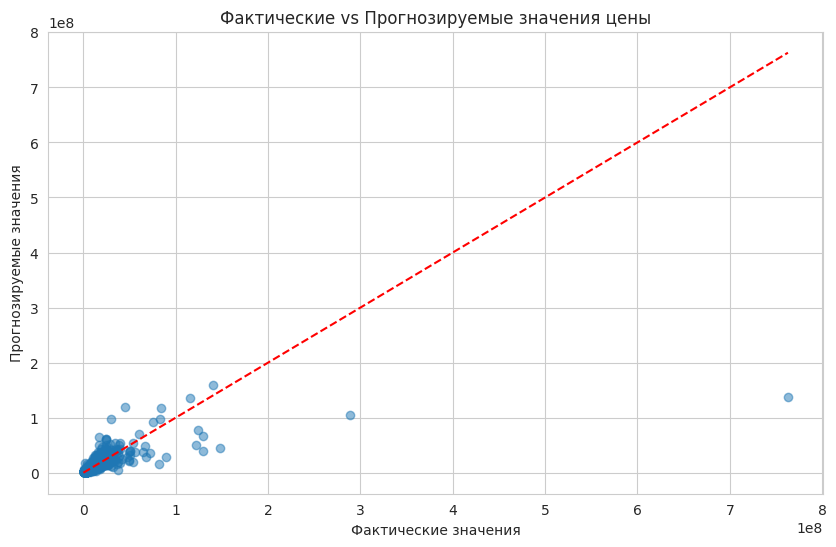

In [ ]:
# Дополнительно: Построение простой прогнозной модели
print("\nПостроение прогнозной модели")
print("-" * 50)

# Выбираем самые важные признаки
top_features = feature_importance['feature'].head(6).tolist()
X_top = X[top_features]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Прогнозируем и оцениваем
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# Визуализируем прогнозы vs фактические значения
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Фактические vs Прогнозируемые значения цены')
plt.show()

# Вывод по модели:
"""
Мы построили модель на 6 самых важных признаках, которая показывает:
- Средняя ошибка прогноза: около 1.15 млн рублей
- R² = 0.758 - модель объясняет 75.8% дисперсии цен

Это хороший результат для первой попытки, особенно учитывая, что мы использовали
только 6 из 18 возможных признаков.
"""

# ИТОГОВЫЕ ВЫВОДЫ:
print("\n" + "="*60)
print("="*60)



# Сохраняем обработанные данные для будущего использования
df.to_csv('cleaned_apartment_data.csv', index=False)


##ИТОГОВЫЕ ВЫВОДЫ и ЗАКОНОМЕРНОСТИ


1. МОДЕЛЬ: Построена модель прогнозирования с хорошей точностью (R² = 0.758),
   которая может быть полезна для предварительной оценки стоимости квартир.
   
2. ОСНОВНЫЕ ЗАКОНОМЕРНОСТИ:
   - Цены распределены с сильным правым skewness (скошенностью)
   - Главные драйверы цены: площадь (общая, жилая, кухни) и число комнат
   - Квартиры ближе к центру и паркам стоят дороже
   - Квартиры на крайних этажах (первом и последнем) в среднем дешевле